In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('salesdata.csv');
df.head(10)



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:

df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


<AxesSubplot:>

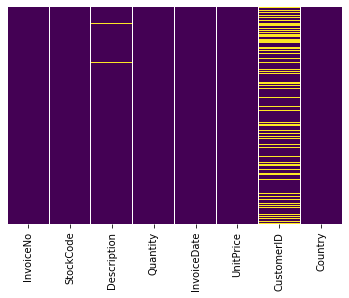

In [4]:
#checking missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Quantity', ylabel='CustomerID'>

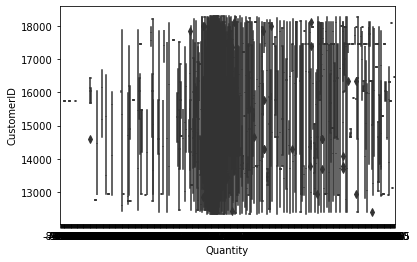

In [5]:
#Replacing Missing values of CustomerID with some form of imputations
sns.boxplot(x='Quantity',y='CustomerID',data=df, palette='winter')
#ax = sns.boxplot(x='StockCode', y='Description',data=df, palette='winter')





In [6]:
UnitPrice_CustomerID_map = {
  1: 0.00,
  2: 3.00,
  3: 6.00,
}
def replace_CustomerID_na(x_df, fill_map):
    cond=x_df['CustomerID'].isna()
    res=x_df.loc[cond,'UnitPrice'].map(fill_map)
    x_df.loc[cond,'CustomerID']=res    
    
    return x_df

res = (
  pd.read_csv('salesdata.csv')
    .pipe(replace_CustomerID_na, UnitPrice_CustomerID_map)
)
res.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


<AxesSubplot:>

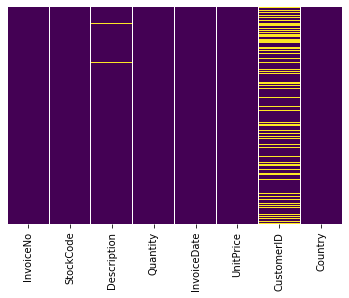

In [7]:

sns.heatmap(res.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
#Select Customers by their country
res = (pd.read_csv('salesdata.csv')
    .pipe(replace_CustomerID_na, UnitPrice_CustomerID_map)
    .query('Country == "France"')
)
res.head(20)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France
32,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/2010 8:45,1.25,12583.0,France
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/2010 8:45,2.95,12583.0,France
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/2010 8:45,2.95,12583.0,France
35,536370,22629,SPACEBOY LUNCH BOX,24,12/1/2010 8:45,1.95,12583.0,France


In [9]:
res.Country.value_counts()

France    8557
Name: Country, dtype: int64

In [10]:
#Grouping_Customers_using Bins
bins=[0, 100, 3000, 90000, sys.maxsize]
labels=['New Customer', 'Discounted Customer', 'Potential Customer', 'Loyal Customer'] 
res =( pd.read_csv('salesdata.csv')
    .pipe(replace_CustomerID_na, UnitPrice_CustomerID_map)
    .query('Country == "United Kingdom"')
    .assign(CustomerGroup = lambda df: pd.cut(df['Quantity'], bins=bins, labels=labels))
)

res.tail(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerGroup
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,12/9/2011 12:20,1.25,12748.0,United Kingdom,New Customer
541845,581580,23126,FELTCRAFT GIRL AMELIE KIT,1,12/9/2011 12:20,4.95,12748.0,United Kingdom,New Customer
541846,581580,22695,WICKER WREATH SMALL,1,12/9/2011 12:20,0.59,12748.0,United Kingdom,New Customer
541847,581580,22144,CHRISTMAS CRAFT LITTLE FRIENDS,1,12/9/2011 12:20,2.10,12748.0,United Kingdom,New Customer
541848,581580,22908,PACK OF 20 NAPKINS RED APPLES,2,12/9/2011 12:20,0.85,12748.0,United Kingdom,New Customer
541849,581580,22894,TABLECLOTH RED APPLES DESIGN,2,12/9/2011 12:20,9.95,12748.0,United Kingdom,New Customer
541850,581580,22704,WRAP RED APPLES,25,12/9/2011 12:20,0.42,12748.0,United Kingdom,New Customer
541851,581580,22721,SET OF 3 CAKE TINS SKETCHBOOK,1,12/9/2011 12:20,1.95,12748.0,United Kingdom,New Customer
541852,581580,22816,CARD MOTORBIKE SANTA,24,12/9/2011 12:20,0.42,12748.0,United Kingdom,New Customer
541853,581580,85049E,SCANDINAVIAN REDS RIBBONS,2,12/9/2011 12:20,1.25,12748.0,United Kingdom,New Customer


In [ ]:
#Pivot_table 
table = pd.pivot_table(df,index=['Country','InvoiceNo','InvoiceDate'],values=['Quantity'], aggfunc=np.mean)
table

In [ ]:
table.plot(kind='bar');


In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=Country, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()